In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools

import common
import timeline

In [2]:
def plot(tl: common.Timeline, y_lab: str):
    rotated = np.vstack([np.array(list(zip(itertools.repeat(idx + common.START_YEAR), tl[:, idx]))) for idx in common.YEAR_OFFSETS])
    df = pd.DataFrame({
        'Year': rotated[:, 0],
        y_lab: rotated[:, 1]
    })
    ax = sns.lineplot(df, x='Year', y=y_lab, errorbar=('pi', 95), estimator='median')
    plt.show()

Percentiles:
 5: 22.812212881717425
15: 27.016635747039984
25: 29.546720584779465
50: 34.145976487561896
75: 38.80001138967823
85: 41.31092023471386
95: 45.508816356823985


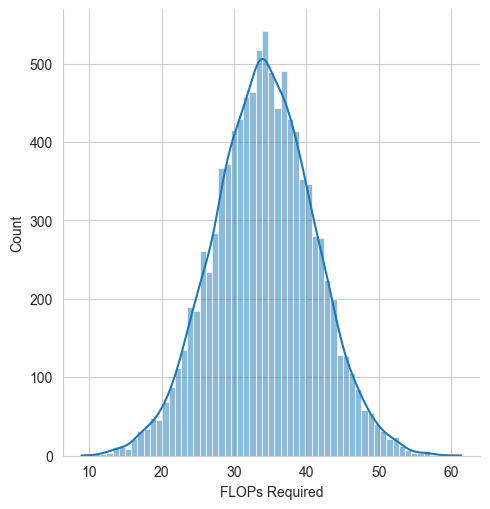

In [3]:
tai_requirements = timeline.tai_requirements()
print("Percentiles:")
for p in [5, 15, 25, 50, 75, 85, 95]:
    print(f'{p:>2}:', np.percentile(tai_requirements, p))


sns.displot(tai_requirements, kde=True);
plt.xlabel('FLOPs Required');

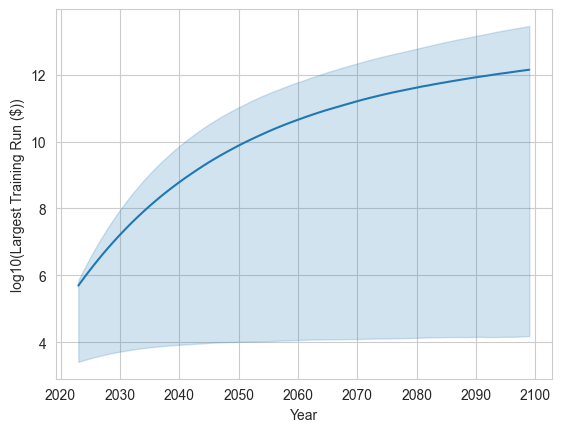

In [4]:
plot(timeline.spending(), 'log10(Largest Training Run ($))')

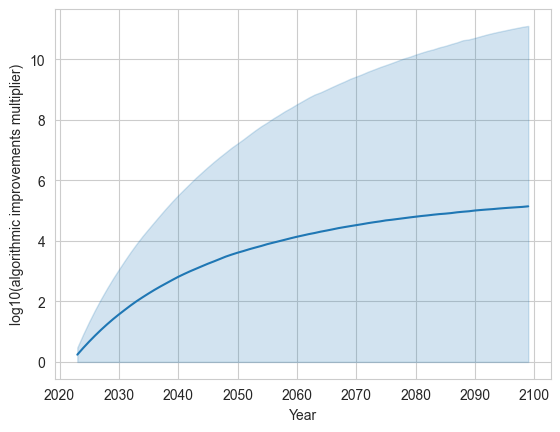

In [5]:
alg_imp_samples = timeline.algorithmic_improvements()

plot(alg_imp_samples, 'log10(algorithmic improvements multiplier)')

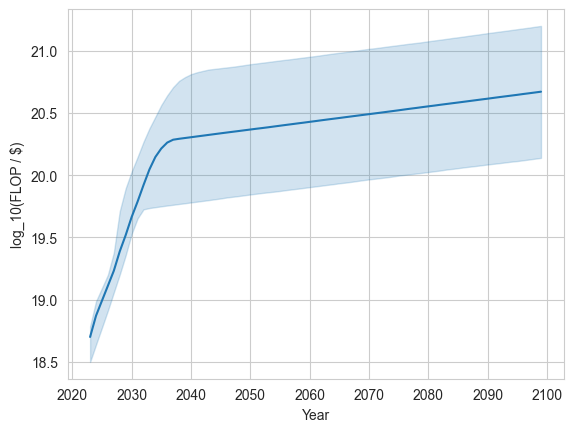

In [6]:
plot(timeline.flops_per_dollar(), 'log_10(FLOP / $)')

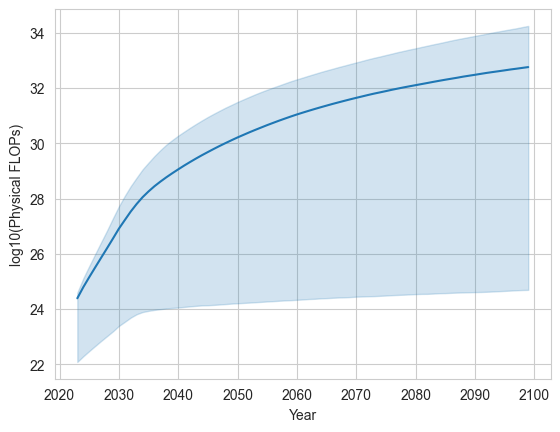

In [7]:
fpd = timeline.flops_per_dollar()
physical_flops = fpd + timeline.spending()

plot(physical_flops, 'log10(Physical FLOPs)')

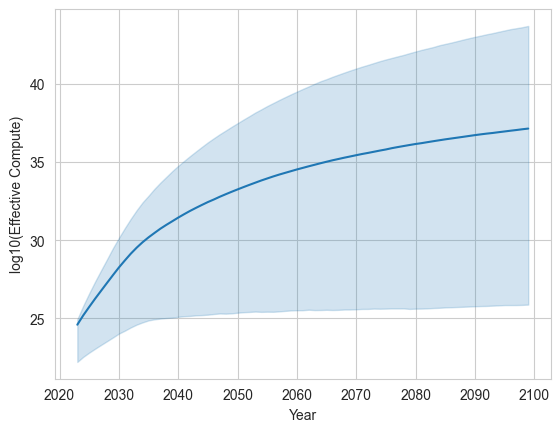

In [8]:
effective_compute = physical_flops + timeline.algorithmic_improvements()
plot(effective_compute, 'log10(Effective Compute)')

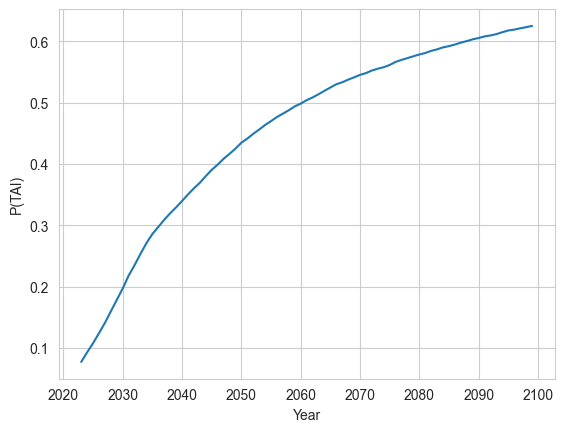

In [9]:
tl = timeline.sample_timeline()

sns.lineplot(pd.DataFrame({
    'Year': np.arange(common.START_YEAR, common.END_YEAR),
    'P(TAI)': tl,
}), x='Year', y='P(TAI)');